In [1]:
# load libraries
library(data.table)
library(tidyverse)
library(scales)
library(ggthemes)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
# 1. load the data
dtData <- data.table::fread(
  file = "worldbank_selected_gdp_time_series_whole_world.csv",
  na.strings = ".."
)
View(dtData[1:10, 1:5])

Country Name,Country Code,Series Name,Series Code,1960 [YR1960]
<chr>,<chr>,<chr>,<chr>,<dbl>
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NA
Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NA
Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NA
Afghanistan,AFG,"GDP per capita, PPP (constant 2017 international $)",NY.GDP.PCAP.PP.KD,NA
Afghanistan,AFG,"GDP, PPP (constant 2017 international $)",NY.GDP.MKTP.PP.KD,NA
Afghanistan,AFG,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NA
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NA
Albania,ALB,GDP (constant 2010 US$),NY.GDP.MKTP.KD,NA
Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NA


In [4]:
# 2. melt the data
cNonDataColnames <- c("country_name", "country_code", "series_name", "series_code")
data.table::setnames(
  x = dtData,
  old = c("Country Name", "Country Code", "Series Name", "Series Code"),
  new = cNonDataColnames
)
cDataColnames <- base::setdiff(x = colnames(dtData), y = cNonDataColnames)
dtData <- data.table::melt.data.table(
  data = dtData,
  id.vars = cNonDataColnames,
  measure.vars = cDataColnames,
  variable.name = "data_year",
  value.name = "variable_value",
  na.rm = F,
  variable.factor = F
)
dtData[, data_year := as.double(readr::parse_number(x = data_year))]
dtData[, variable_value_in_bln := variable_value / 1e9]
View(head(dtData))

country_name,country_code,series_name,series_code,data_year,variable_value,variable_value_in_bln
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,NA,NA
Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1960,NA,NA
Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1960,NA,NA
Afghanistan,AFG,"GDP per capita, PPP (constant 2017 international $)",NY.GDP.PCAP.PP.KD,1960,NA,NA
Afghanistan,AFG,"GDP, PPP (constant 2017 international $)",NY.GDP.MKTP.PP.KD,1960,NA,NA
Afghanistan,AFG,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,1960,NA,NA


In [5]:
# 3. prepare dictionary of country codes
dtDictionaryCountryCodes <- dtData[, list(country_name, country_code)]
dtDictionaryCountryCodes <- unique(dtDictionaryCountryCodes)

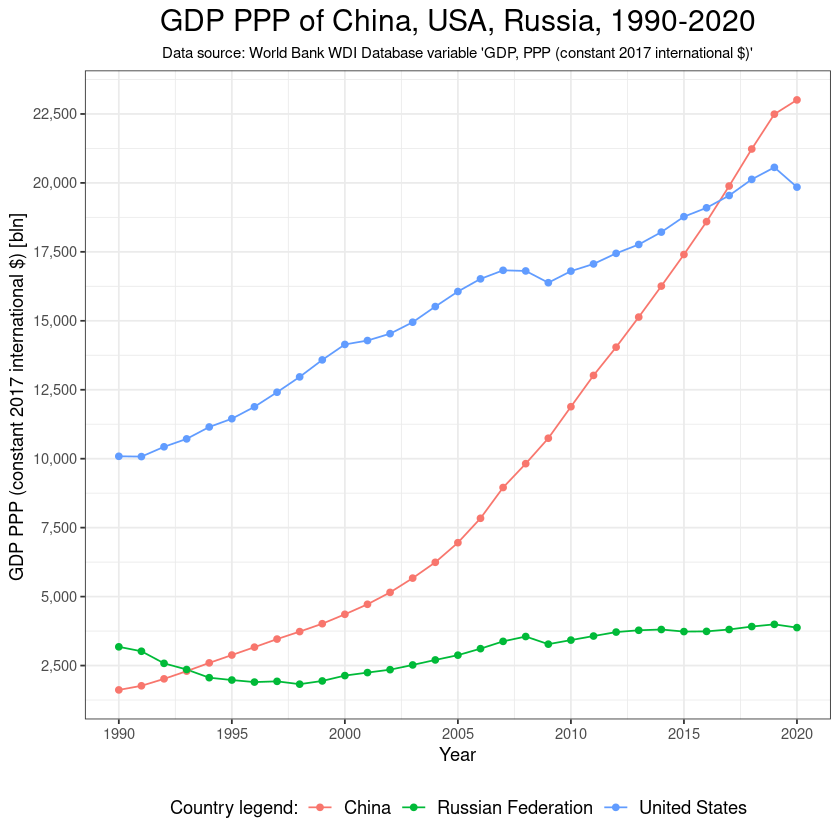

In [6]:
# 4. analyze GDP PPP of the Big Three: USA, China, Russia
# full name of the variable used: GDP, PPP (constant 2017 international $)
# 4.1. extract the relevant data
cBigTriangleCountryCodes <- c("CHN", "RUS", "USA")
dtBigThree <- dtData[country_code %in% cBigTriangleCountryCodes, ]
dtBigThree <- dtBigThree[series_code == "NY.GDP.MKTP.PP.KD", ]
dtBigThree <- dtBigThree[data_year >= 1990, ]
# 4.2. make a simple line plot
dtBigThree$series_name <- NULL
dtBigThree$series_code <- NULL
dtBigThree$country_code <- NULL
dtBigThree$variable_value <- NULL
plotGdpPppConstant2017Dollars <- ggplot(
  data = dtBigThree,
  mapping = aes(x = data_year, y = variable_value_in_bln, color = country_name)
) + 
  geom_line() +
  geom_point() +
  theme_bw() +
  xlab(label = "Year") +
  ylab(label = "GDP PPP (constant 2017 international $) [bln] ") + 
  ggtitle(
    label = "GDP PPP of China, USA, Russia, 1990-2020",
    subtitle = "Data source: World Bank WDI Database variable 'GDP, PPP (constant 2017 international $)'"
  ) + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 18),
    plot.subtitle = element_text(hjust = 0.5, size = 9),
    legend.position = "bottom",
    legend.text = element_text(size=11)
  ) + 
  labs(
    color = "Country legend:"
  ) + scale_y_continuous(
    labels = scales::comma,
    breaks = seq(0, 25000, 2500)
  ) + 
  scale_x_continuous(
    breaks = seq(1990, 2020, by = 5)
  )
plotGdpPppConstant2017Dollars

country_name,data_year,variable_value_in_bln
<chr>,<dbl>,<dbl>
China,1990,1616.386
Russian Federation,1990,3178.790
United States,1990,10087.555
China,1991,1766.108
Russian Federation,1991,3018.358
United States,1991,10076.634


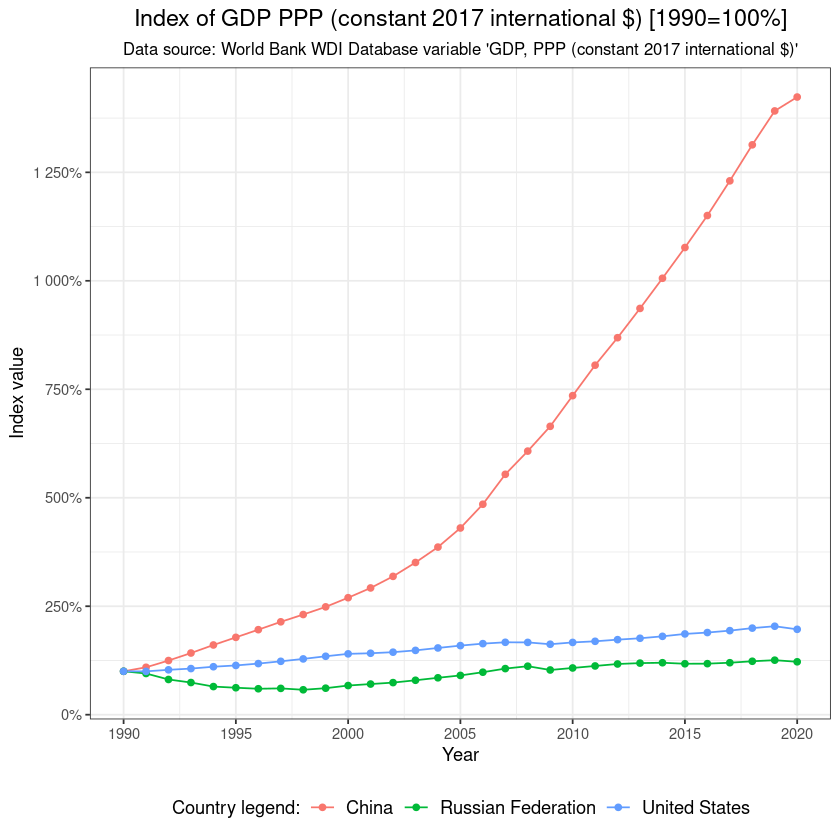

In [7]:
# 4.3. pivot to wide format and prepare chart of index
head(dtBigThree)
dtBigThreeWide <- data.table::dcast(
  data = dtBigThree,
  formula = data_year ~ country_name,
  value.var = "variable_value_in_bln"
)
# mValues <- as.matrix(dtBigThreeWide[, c("China", "Russian Federation", "United States")])
dtValues <- dtBigThreeWide[, c("China", "Russian Federation", "United States")] /
  c(dtBigThreeWide[1, c("China", "Russian Federation", "United States")])
dtBigThreeWideIndexes <- cbind(data_year = dtBigThreeWide[, data_year], dtValues)
dtBigThreeLongIndexes <- data.table::melt.data.table(
  data = dtBigThreeWideIndexes,
  id.vars = "data_year",
  measure.vars = c("China", "Russian Federation", "United States"),
  variable.name = "country_name",
  value.name = "index_value"
)
plotIndexGdpPppGrowth <- ggplot(
  data = dtBigThreeLongIndexes,
  mapping = aes(
    x = data_year,
    y = index_value,
    color = country_name
  )
) + 
  theme_bw() +
  geom_line() +
  geom_point() +
  xlab(label = "Year") +
  ylab(label = "Index value") + 
  ggtitle(
    label = "Index of GDP PPP (constant 2017 international $) [1990=100%]",
    subtitle = "Data source: World Bank WDI Database variable 'GDP, PPP (constant 2017 international $)'"
  ) + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 10),
    legend.position = "bottom",
    legend.text = element_text(size=11)
  ) + 
  labs(
    color = "Country legend:"
  ) + scale_y_continuous(
    labels = scales::percent,
    breaks = seq(0, 15, by = 2.5)
  ) + 
  scale_x_continuous(
    breaks = seq(1990, 2020, by = 5)
  ) 
plotIndexGdpPppGrowth

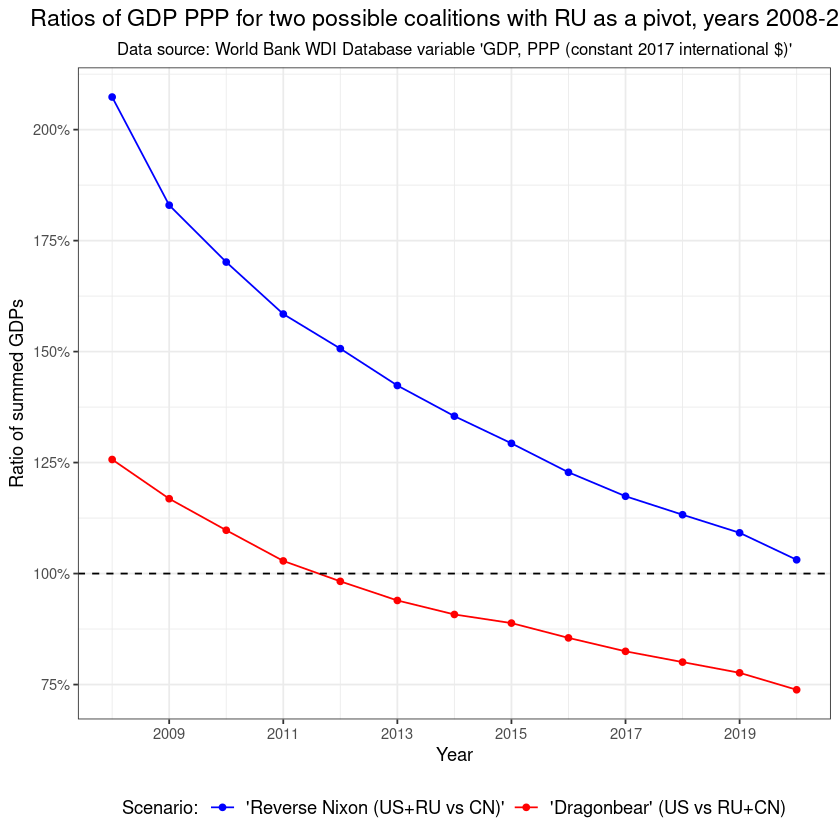

In [12]:
# 4.4. calculate ratios of (Russia+China)/USA and (Russia+USA)/China
dtBigThreeWide[["Reverse Nixon"]] <- (dtBigThreeWide[["United States"]] + 
  dtBigThreeWide[["Russian Federation"]]) / dtBigThreeWide[["China"]]
dtBigThreeWide[["Dragonbear"]] <- (dtBigThreeWide[["United States"]]) / 
  (dtBigThreeWide[["China"]] + dtBigThreeWide[["Russian Federation"]])
dtBigThreeLongScenariosIndexes <- data.table::melt.data.table(
  data = dtBigThreeWide,
  id.vars = "data_year",
  measure.vars = c("Reverse Nixon", "Dragonbear"),
  variable.name = "Scenario",
  value.name = "index_value"
)
dtBigThreeLongScenariosIndexes <- dtBigThreeLongScenariosIndexes[data_year >= 2008, ]

plotIndexGdpPppScenarios <- ggplot(
  data = dtBigThreeLongScenariosIndexes,
  mapping = aes(
    x = data_year,
    y = index_value,
    color = Scenario
  )
) + 
  theme_bw() +
  geom_line() +
  geom_point() +
  xlab(label = "Year") +
  ylab(label = "Ratio of summed GDPs") + 
  ggtitle(
    label = "Ratios of GDP PPP for two possible coalitions with RU as a pivot, years 2008-2020",
    subtitle = "Data source: World Bank WDI Database variable 'GDP, PPP (constant 2017 international $)'"
  ) + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 10),
    legend.position = "bottom",
    legend.text = element_text(size=11)
  ) + 
  labs(
    color = "Scenario:"
  ) + scale_y_continuous(
    labels = scales::percent,
    breaks = seq(0, 3, by = 0.25)
  ) + 
  scale_x_continuous(
    breaks = seq(2005, 2020, by = 2)
  ) + 
  geom_hline(yintercept = 1.00, linetype = "dashed", color = "black") + 
  scale_color_manual(
    labels = c(
      "'Reverse Nixon (US+RU vs CN)'", 
      "'Dragonbear' (US vs RU+CN)"
    ), values = c("blue", "red")
  )
plotIndexGdpPppScenarios

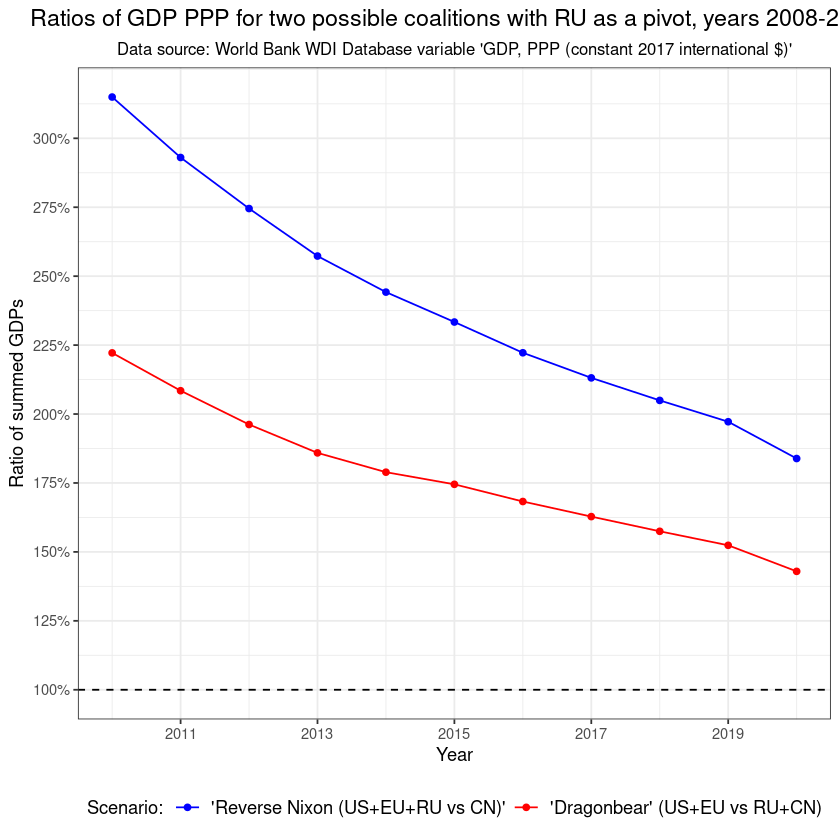

In [13]:
# 4.5. factoring-in EU
cBigFourCountryCodes <- c("CHN", "RUS", "USA", "EUU")
dtBigFour <- dtData[country_code %in% cBigFourCountryCodes, ]
dtBigFour <- dtBigFour[series_code == "NY.GDP.MKTP.PP.KD", ]
dtBigFour$series_code <- NULL
dtBigFour$series_name <- NULL
dtBigFour$country_code <- NULL
dtBigFour <- dtBigFour[data_year >= 2008, ]
dtBigFourWide <- data.table::dcast(
  data = dtBigFour,
  formula = data_year ~ country_name,
  value.var = "variable_value_in_bln"
)
dtBigFourWide[["Reverse Nixon"]] <- (dtBigFourWide[["United States"]] + 
                                       dtBigFourWide[["Russian Federation"]] + 
                                       dtBigFourWide[["European Union"]]
                                       ) / dtBigFourWide[["China"]]
dtBigFourWide[["Dragonbear"]] <- (dtBigFourWide[["United States"]] + dtBigFourWide[["European Union"]]) / 
  (dtBigFourWide[["China"]] + dtBigFourWide[["Russian Federation"]])


dtBigFourLongScenariosIndexes <- data.table::melt.data.table(
  data = dtBigFourWide,
  id.vars = "data_year",
  measure.vars = c("Reverse Nixon", "Dragonbear"),
  variable.name = "Scenario",
  value.name = "index_value"
)
dtBigFourLongScenariosIndexes <- dtBigFourLongScenariosIndexes[data_year >= 2010, ]

plotIndexGdpPppScenarios2 <- ggplot(
  data = dtBigFourLongScenariosIndexes,
  mapping = aes(
    x = data_year,
    y = index_value,
    color = Scenario
  )
) + 
  theme_bw() +
  geom_line() +
  geom_point() +
  xlab(label = "Year") +
  ylab(label = "Ratio of summed GDPs") + 
  ggtitle(
    label = "Ratios of GDP PPP for two possible coalitions with RU as a pivot, years 2008-2020",
    subtitle = "Data source: World Bank WDI Database variable 'GDP, PPP (constant 2017 international $)'"
  ) + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 10),
    legend.position = "bottom",
    legend.text = element_text(size=11)
  ) + 
  labs(
    color = "Scenario:"
  ) + scale_y_continuous(
    labels = scales::percent,
    breaks = seq(0, 3, by = 0.25)
  ) + 
  scale_x_continuous(
    breaks = seq(2005, 2020, by = 2)
  ) + 
  geom_hline(yintercept = 1.00, linetype = "dashed", color = "black") + 
  scale_color_manual(
    labels = c(
      "'Reverse Nixon (US+EU+RU vs CN)'", 
      "'Dragonbear' (US+EU vs RU+CN)"
    ), values = c("blue", "red")
  )
plotIndexGdpPppScenarios2
